In [1]:
import gc
import sys
sys.path.insert(0, "..")
gc.enable()

In [2]:
import os
from DataLoader import *
from utils.utilities import *
from utils.visualization import *
from my_models.unet import UNet
import tensorflow as tf
import pandas as pd

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

tf.debugging.set_log_device_placement(True)

Num GPUs Available:  0


In [3]:
PATH = r'D:\DATA\Airbus Ship Detection Challenge\airbus-ship-detection'

dl = DataLoader()
train_df, valid_df = dl.train_split(0.05, filterNan=True)
print("train set shape", train_df.shape)
print("validation set shape", valid_df.shape)

C:\Users\user\PycharmProjects\airbus_ship_detection\DataLoader.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_masks["ships"] = train_masks["EncodedPixels"].map(


train set shape (84466, 5)
validation set shape (4446, 5)


In [4]:
grouped_images_gen = dl.get_grouped_images_gen(train_df)# f="sobel_op") # applying filters increases dramatically the execution time
aug_gen = get_augmented_images_generator(grouped_images_gen)
valid_x, valid_y = next(dl.get_grouped_images_gen(valid_df, batch_size=1000))#, f="sobel_op")) #

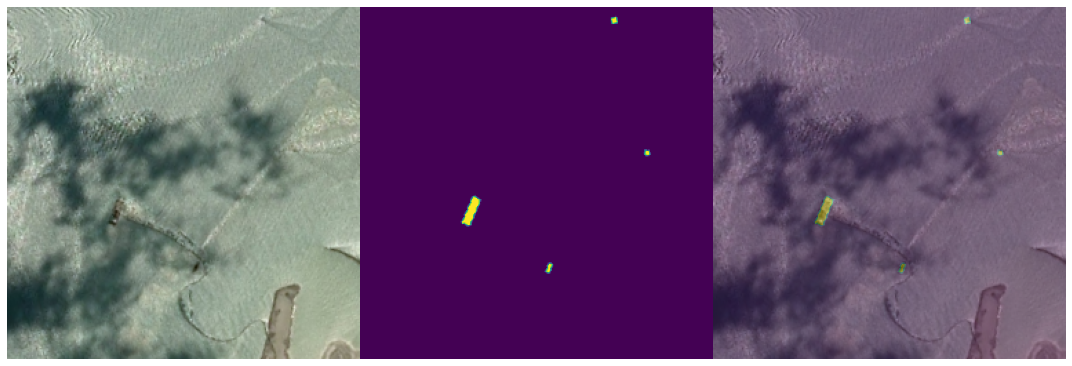

In [5]:
train_x, train_y = next(aug_gen)
plot_masks(train_x[6], train_y[6])


In [10]:
t_x, t_y = next(aug_gen)
x_shape =np.squeeze(t_x[0]).shape
unet_model = UNet(x_shape, "my_models")
unet_model.compile()


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localh

Steps per epoch: 500
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Execu

FileNotFoundError: [Errno 2] No such file or directory: 'my_modelsresults/U-Net_loss.jpg'

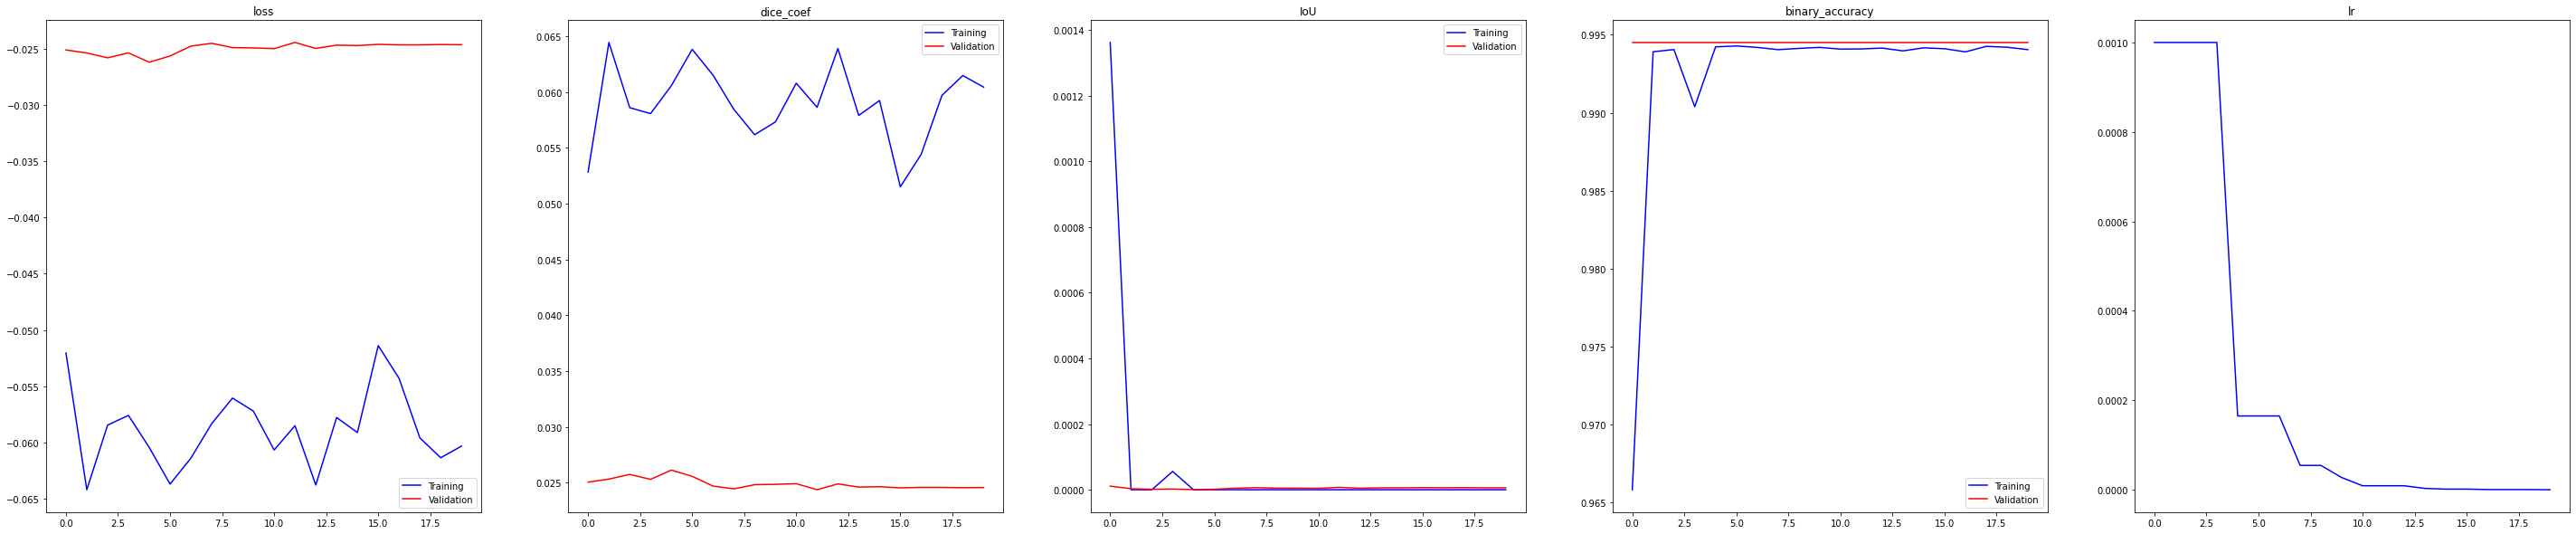

In [11]:
hl = unet_model.train(aug_gen, train_df.shape[0], valid_set=(valid_x, valid_y), epochs=20, train_steps=500)
unet_model.show_loss(hl)
